# Introduction

이 커널은 CSV 파일에서 수행할 수 잇는 다양한 시각화의 탐색 및 통합입니다. 비주얼은 플롯과 matplotlib에서 나온다. 게다가, 그것은 또한 우리가 먹는 음식의 질과 그것이 운반하는 영양소에 대한 귀중한 통찰력을 가지고 있습니다.

## 식품과 영양

![Nutrition Image](https://images.unsplash.com/photo-1498837167922-ddd27525d352?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80)


음식과 영양은 우리 몸에 에너지를 공급하면서 연료를 얻는 방법입니다. 우리는 우리 몸에 있는 영양분을 매일 새로운 공급으로 대체할 필요가 있습니다. 물은 영양의 중요한 구성요소이다. 지방, 단백질, 그리고 탄수화물은 모두 필요하다.영양학( nutrition nutrition學, )은 생물의 유지, 성장, 생식, 건강, 질병과 관련하여 음식물의 영양소와 다른 물질들을 해석하는 학문이다. 섭취, 흡수, 동화, 생합성, 이화작용, 배설 등이 포함된다.


의식적으로 알고 먹는 것은 건강한 내장을 위해서뿐만 아니라 마음의 평화를 위해서도 필수적이다. 또한, 야채, 과일, 그리고 통곡물로 채워진 식단은 뇌졸중, 당뇨 그리고 심장병과 같은 주요 질병들을 예방하는데 도움이 될 수 있습니다.종종, 우리는 우리 몸에 꼭 알맞지 않은 우리가 좋아하는 음식을 게걸스럽게 먹는 것을 좋아한다.그러한 혹이 가끔 발생하는 것은 괜찮지만, 만약 그 사람이 건강에 좋은 음식과 균형을 맞추지 않는다면 그러한 식단은 극도로 해로울 수 있다.


이 노트는 가장 흔한 음식과 그안에 잇는 영양학적 사실을 분석한다.

## 데이터 정리



데이터 정리는 모든 데이터 과학 프로젝트의 첫 번째 단계입니다. 여기 데이터는 깨끗해 보이지만 약간의 수정이 필요합니다.


In [ ]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go


In [ ]:
nutrients=pd.read_csv("nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


우선, 데이터의 t는 작은 양을 나타내므로 0으로 대체하는게 좋음

In [ ]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


이제, 우리는 숫자 데이터를 각각의 정수나 부동 변수로 변환하기 위해 데이터 세트에서 쉼표와 같은 모든 표현을 제거해야함

In [ ]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)/2

이제 그램, 칼로리, 단백질, 지방, 포화지방, 섬유질, 탄수화물 데이터형을 int로 변환해봄

In [ ]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [ ]:
nutrients.dtypes


Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [ ]:
nutrients.shape

(335, 10)

모든 데이터가 원하는 유형으로 변경될걸 확인할 수 있음


### 데이터 품질에 대한 마지막 빠른 확인 

In [ ]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

Sat.Fat(2), Calories(1), Fiber에 null값이 있음. 이행을 완전히 삭제함

In [ ]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 10)

In [ ]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   331.000000   331.000000  331.000000  331.000000  331.000000   
mean    143.703927   188.622356    8.561934    8.450151    6.477341   
std     139.368130   184.342696   17.828601   19.741199   18.566880   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   130.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

## 데이터 시각화와 분석

특징을 서로 그림으로 표시하여 분석을 시작하겠습니다. 이것은 우리에게 서로에 대한 특징의 분포를 제공할 뿐만 아니라 데이터의 빠른 정량적 느낌을 줄 것이다.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

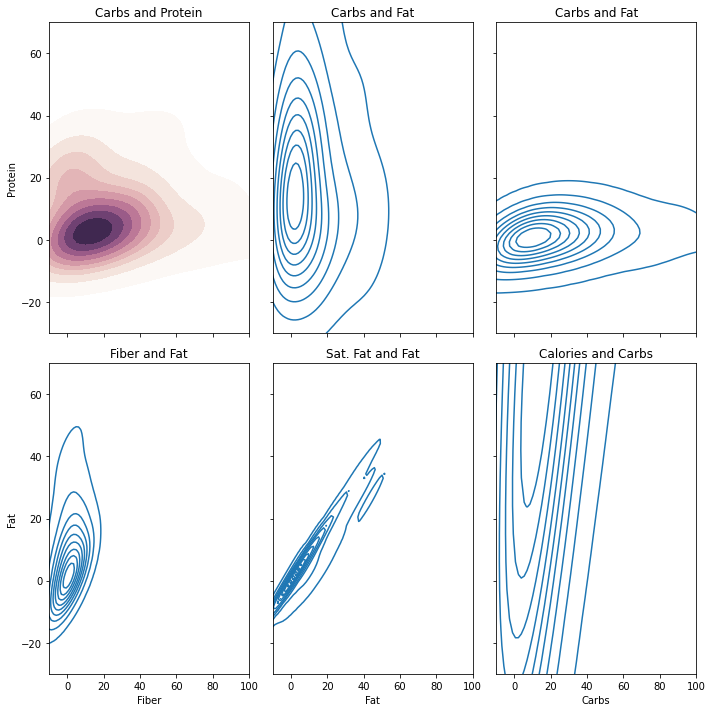

In [ ]:
# Plotting the KDEplots

import matplotlib.pyplot as plt


f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Protein'],cmap=cmap,shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fat'],nutrients['Carbs'], ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Fiber'], ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fiber'],nutrients['Fat'], ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(nutrients['Fat'],nutrients['Sat.Fat'], ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(nutrients['Carbs'],nutrients['Calories'], ax=axes[1,2])
axes[1,2].set(xlim=(-10, 100), ylim=(-30, 70), title = 'Calories and Carbs')

f.tight_layout()


## 개별 메트릭스에 대해 자세히 알아보기

야채와 곡류 중에서 단백질이 가장 풍부한 음식은 무엇인가?

In [ ]:

alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

따라서, 곡물, 채소, 씨앗의 범주에서, 통밀은 흰 빵 다음으로 가장 많은 단백질 함량을 가지고 있습니다. 콩도 상위 20위 안에 든다. 또한, 아몬드는 씨즈 부문에서 1위를 차지했습니다.🌱


## 피해야 할 음식

칼로리가 가장 높은 음식은 무엇입니까?

In [ ]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

강화 우유는 칼로리가 가장 높고, 흰 빵이 그 뒤를 잇는다. 또한, 통밀이 어떻게 가장 많은 단백질을 가지고 있지만 거의 같은 양의 칼로리를 가지고 있는지 보세요. 라드는 대부분의 칼로리를 가진 지방 공급원이며 아이스크림 1/2컵이 디저트 부문에서 1위를 차지합니다.


## 지방 함량

일반적으로, 지방 공급원은 종종 무시된다. 하지만, 건강한 내장을 위해서는 어느 정도의 지방이 필요합니다.
기름진 음식을 살펴봅시다.

In [ ]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

그러므로, 굴과 버터는 칼로리와 지방의 가장 큰 조합을 가지고 있고, 그 다음이 라드입니다.


## 카테고리 분석

데이터를 카테고리로 그룹화하면 모든 메트릭의 총 개수를 얻을 수 있으므로 카테고리를 분석할 수 있습니다

In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist


,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,
Breads cereals fastfoodgrains,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,1973,1228.0,7,1,0.0,17.40,330.0


In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

위 원형 차트의 일부 추론

- 빵, 곡물, 시리얼이 탄수화물과 칼로리를 가장 많이 함유하고 있다는 것은 분명하다.

- 단백질의 가장 큰 퍼센트는 해산물에 있습니다 

- 놀랍게도, 같은 양의 섬유질이 지방과 해산물에도 있습니다.

- 씨앗과 견과류는 약 14%의 지방 함량을 가지고 있다.

- 과일은 탄수화물을 제외한 어떤 범주에서도 큰 비율을 가지고 있지 않으며, 약 10%의 탄수화물을 가지고 있다.

- 유제품(15%)은 해산물(11.8%)보다 포화지방 함량이 높다.


## 음료, 술, 음료수 그리고 디저트 분석

In [ ]:
drinks= nutrients[nutrients['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

그래서, 푸딩은 가장 많은 칼로리를 가지고 있고 그다음이 초콜릿 퍼지임

In [ ]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

파이와 퍼지는 지방 함량도 가장 높음

## 고기, 가금류(새고기, 알), 해산물 분석

- 고기/해산물에는 단백질이 풍부하다는 것이 분명하므로, 단백질이 풍부한 음식을 찾아보자

In [ ]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

굴은 단백질이 많고, 광어 가자미는 단백질 함량이 6.59%임

## 해산물과 고기는 항상 지방 함량이 좋은것으로 알려져있음 가장 뚱뚱한 물고기를 찾아보자.

In [ ]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

그래서 지방 함량이 높을 뿐 아니라 단백질 함량만 높다. 돼지고기 소시지는 로스트 비프 다음으로 높다. 또한, 가장 뚱뚱한 고기 10위 안에 어떤 종류의 생선도 들어 있지 않습니다. 생선은 지방이 적은 편인 것 같네요.


## 마지막으로 식이섬유가 가장 많은 고기를 찾아보자

In [ ]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


Bacon, Halibut, Turkey 그리고 송아지들이 섬유 함량 면에서 차트의 1위를 차지했습니다.


## 3D 산점도

3D 산점도는 세 변수 간의 관계를 표시하기 위해 세 축에 데이터 점을 표시하는 데 사용됩니다. 데이터 테이블의 각 행은 X, Y 및 Z 축에 설정된 열의 값에 따라 위치가 달라지는 마커로 표시됩니다. 기본적으로 이전 그림과 같이 정규 x-y 산점도의 z축에 일부 데이터를 표시합니다.

그것들은 흥미롭고 많은 추론을 제공하지 않을 수 있지만, 시각적으로 매력적이다.


In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Fat'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Carbs'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

## 칼로리 함량이 가장 많은 식품군

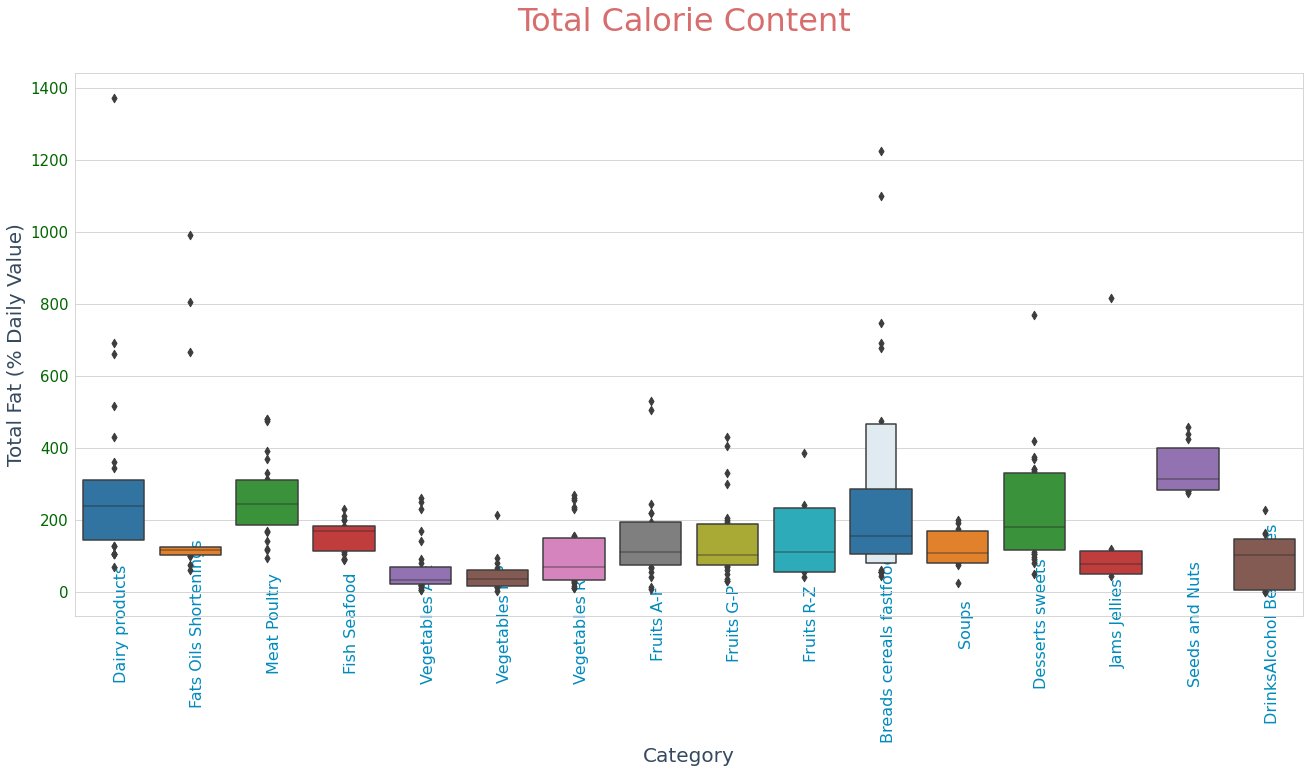

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=nutrients, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()
